In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

C:\Users\gusrl\AppData\Local\Temp\ipykernel_25460\3075631736.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [2]:
print(f'Feature 수: {train.columns.values.size}')

Feature 수: 29


In [3]:
train.shape

(59299, 29)

In [4]:
feature_summary = pd.DataFrame(train.dtypes, columns=["Data Type"])
feature_summary.reset_index(inplace=True)
feature_summary.rename(columns={'index': 'Feature 이름'}, inplace=True)
feature_summary['고유값 수'] = train.nunique().values
feature_summary['결측값 수'] = train.isnull().sum().values
feature_summary['첫번째 행'] = train.loc[0].values
feature_summary['두번째 행'] = train.loc[1].values
feature_summary['세번째 행'] = train.loc[2].values
feature_summary['비고'] = [' Budget(예산), Title(고객의 직책/직급), Need(요구사항), Timeline(희망 납기일)이 작성된 비율이다',
                          '국적', '사업부', 'oppty 비율', '회사명', '고객 유형', '기업의 규모', '이전에 Converted 횟수', '특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여', 
                          '특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여', '위에 2개의 Feature중에 1값을 하나라도 가지면 1',
                          '직업군', 'Lead Descriptoin 텍스트 총 길이', '고객의 문의 유형', '요청 제품 카테고리', '요청 제품 하위 카테고리', '요정 제품 모델명', '지역정보', '고객의 회사 직책', 
                          '법인명', '고객이 요청한 처리 일정', '특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치', '특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치',
                          '전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값', '특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산', '고객의 사업 영역', '세부 사업 영역',
                          '영업 담당자 이름', '영업 성공 여부']
for idx, col in enumerate(feature_summary['Feature 이름'].values):
    print(f"{col}의 고유값: {train[col].unique()} \n")
print(f'Train set의 Sample 수: {train.shape[0]}')
feature_summary    

bant_submit의 고유값: [1.   0.75 0.5  0.25 0.  ] 

customer_country의 고유값: ['/Quezon City/Philippines' '/PH-00/Philippines' '/Kolkata /India' ...
 '/Pisco/Peru' '/santa cruz bolivia/Peru' '/paris/France'] 

business_unit의 고유값: ['AS' 'ID' 'IT' 'Solution' 'CM'] 

com_reg_ver_win_rate의 고유값: [0.06666667 0.08888889 0.04081633 0.00393701        nan 0.05753425
 0.075      0.04464286 0.08433735 0.0199005  0.07494867 0.04347826
 0.03119584 0.14705882 0.03305785 0.08069164 0.33333333 0.04310345
 0.11627907 0.01351351 0.04854369 0.01818182 0.01185771 0.21428571
 0.3902439  0.03225806 0.01754386 0.03278689 0.05555556 0.01515152
 0.46153846 0.06818182 0.08333333 0.26923077 0.18181818 0.23076923
 0.64285714 0.16666667 0.01724138 0.05389222 0.04968944 0.01098901
 0.06779661 0.03703704 0.00378788 0.36363636 0.10526316 0.61538462
 0.08695652 0.05442177 0.05319149 0.07142857 0.04       0.04166667
 0.02892562 0.11842105 0.04918033 0.11864407 0.07324841 0.02898551
 0.01960784 0.02272727 0.004      0.125      0

,Feature 이름,Data Type,고유값 수,결측값 수,첫번째 행,두번째 행,세번째 행,비고
0,bant_submit,float64,5,0,1.0,1.0,1.0,"Budget(예산), Title(고객의 직책/직급), Need(요구사항), Tim..."
1,customer_country,object,15399,982,/Quezon City/Philippines,/PH-00/Philippines,/Kolkata /India,국적
2,business_unit,object,5,0,AS,AS,AS,사업부
3,com_reg_ver_win_rate,float64,80,44731,0.066667,0.066667,0.088889,oppty 비율
4,customer_idx,int64,35112,0,32160,23122,1755,회사명
5,customer_type,object,33,43961,End-Customer,End-Customer,End-Customer,고객 유형
6,enterprise,object,2,0,Enterprise,Enterprise,Enterprise,기업의 규모
7,historical_existing_cnt,float64,136,45543,NaN,12.0,144.0,이전에 Converted 횟수
8,id_strategic_ver,float64,1,55855,NaN,NaN,NaN,"특정 사업부(Business Unit), 특정 사업 영역(Vertical Level..."
9,it_strategic_ver,float64,1,58178,NaN,NaN,NaN,"특정 사업부(Business Unit), 특정 사업 영역(Vertical Level..."


### Data Visualize

In [38]:
feature_summary['비고'].loc[22]

'특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치'

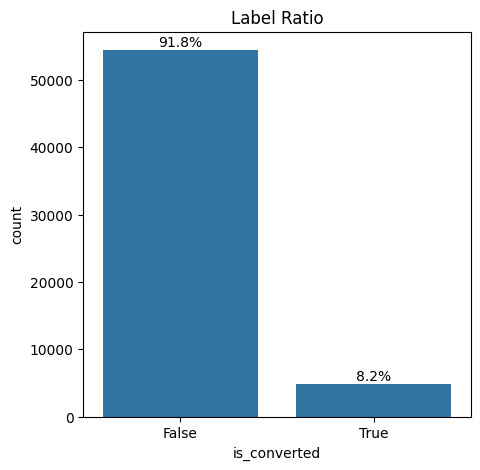

In [5]:
# 9:1 비율로 압도적으로 전환 비율이 작다. 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

def percentage(ax, total_size):
    # patch가 ax 축별로 담고 있는 객체를 의미한다. 
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_under = patch.get_x()
        percent = (height/total_size) * 100
        
        ax.text(x = left_under+(width/2), y = height+total_size*0.01,
               s = f'{percent:1.1f}%',
               ha = 'center')  # 수평정렬이다. horizontal aligment

mpl.rc('font', size = 10)
plt.figure(figsize=(5,5))
ax = sns.countplot(data= train, x='is_converted')
plt.title('Label Ratio')
percentage(ax, len(train))


### Categorical (초기분석)
1. bant_submit: 결측치 없고 고유값 5개로 나눠서 비교해볼만함 
2. business_unit: 결측치 없고 고유값 5개로 나눠서 비교해볼만함
3. enterprise: 결측치 없고 고유값 2개로 나눠서 비교해볼만함
4. customer_position: 결측치는 없지만 고유값이 117개로 비교적 많이 나눠져있다. 하지만, 데이터가 별로 없어서 feature는 많아도 상관없으니 나눠볼 필요가 있다. 
5. ver_cus, ver_pro: 결측은 없지만 1에 대한 True 비율 확인해볼 필요있다. 


추가적으로, True 비율만 빼서 Feature들과의 상관관계를 비교해볼 필요가 있다.  

In [1]:
import matplotlib.gridspec as gridspec

def countplot_with_target(train, feature_list, nrows, ncols, size):
    plt.tight_layout()
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(nrows, ncols)
    
    for idx, feature in enumerate(feature_list):
        ax = plt.subplot(grid[idx])
        sns.countplot(data=train, x=feature, hue='is_converted', ax = ax)
        percentage(ax, len(train))
        ax.set_title(f"{feature} and target Dist")

c:\Users\gusrl\anaconda3\envs\pytorch_py39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gusrl\anaconda3\envs\pytorch_py39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gusrl\anaconda3\envs\pytorch_py39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gusrl\anac

<Figure size 640x480 with 0 Axes>

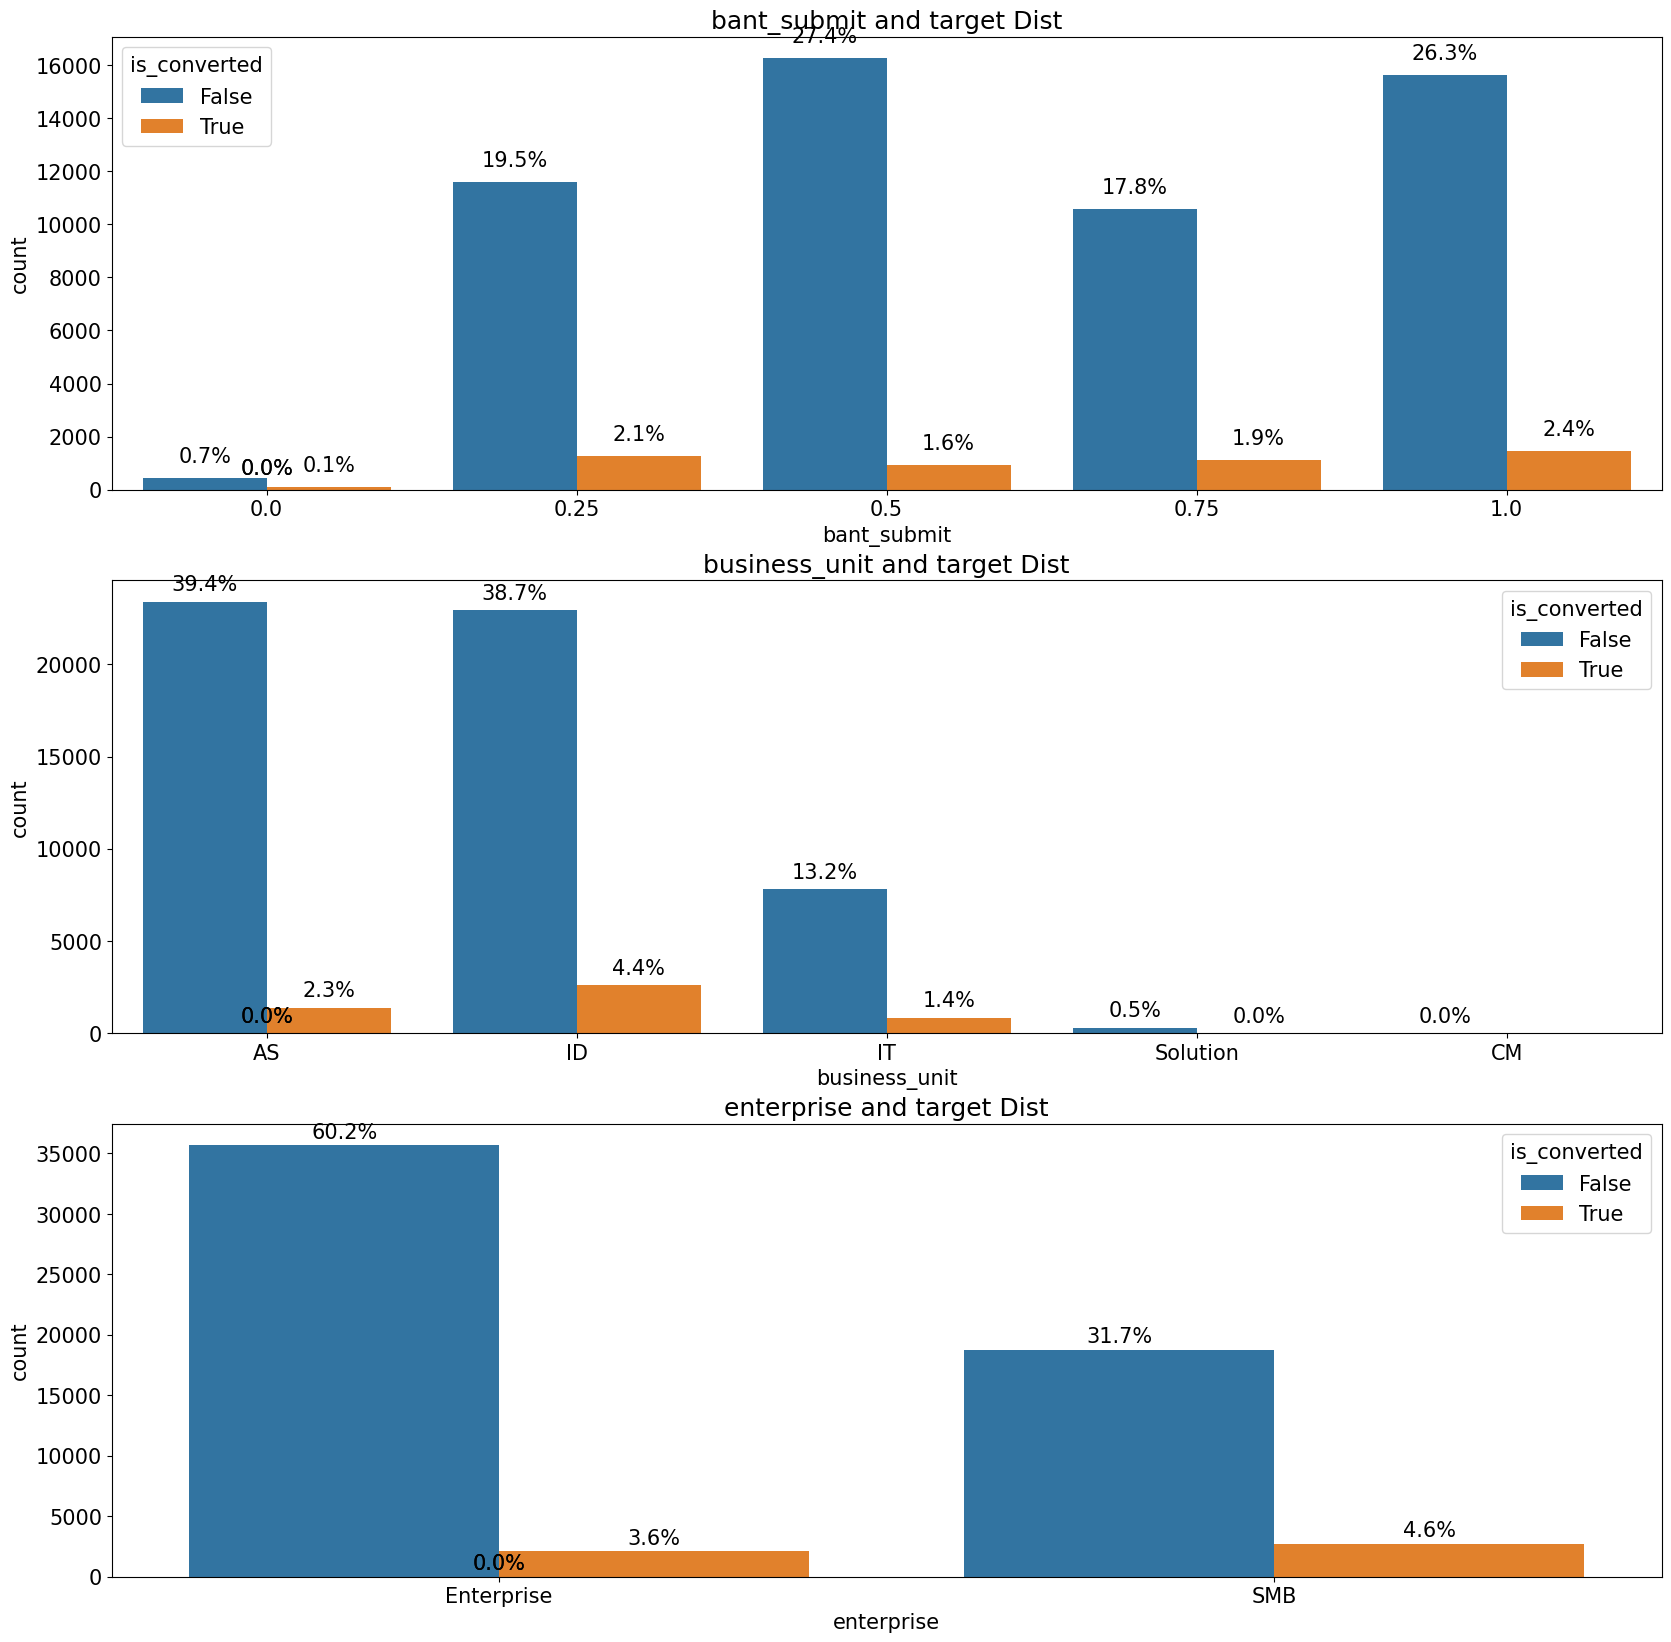

In [48]:
feature_list = ['bant_submit', 'business_unit', 'enterprise']
countplot_with_target(train, feature_list, 3, 1, (20, 20))

c:\Users\gusrl\anaconda3\envs\pytorch_py39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gusrl\anaconda3\envs\pytorch_py39\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 640x480 with 0 Axes>

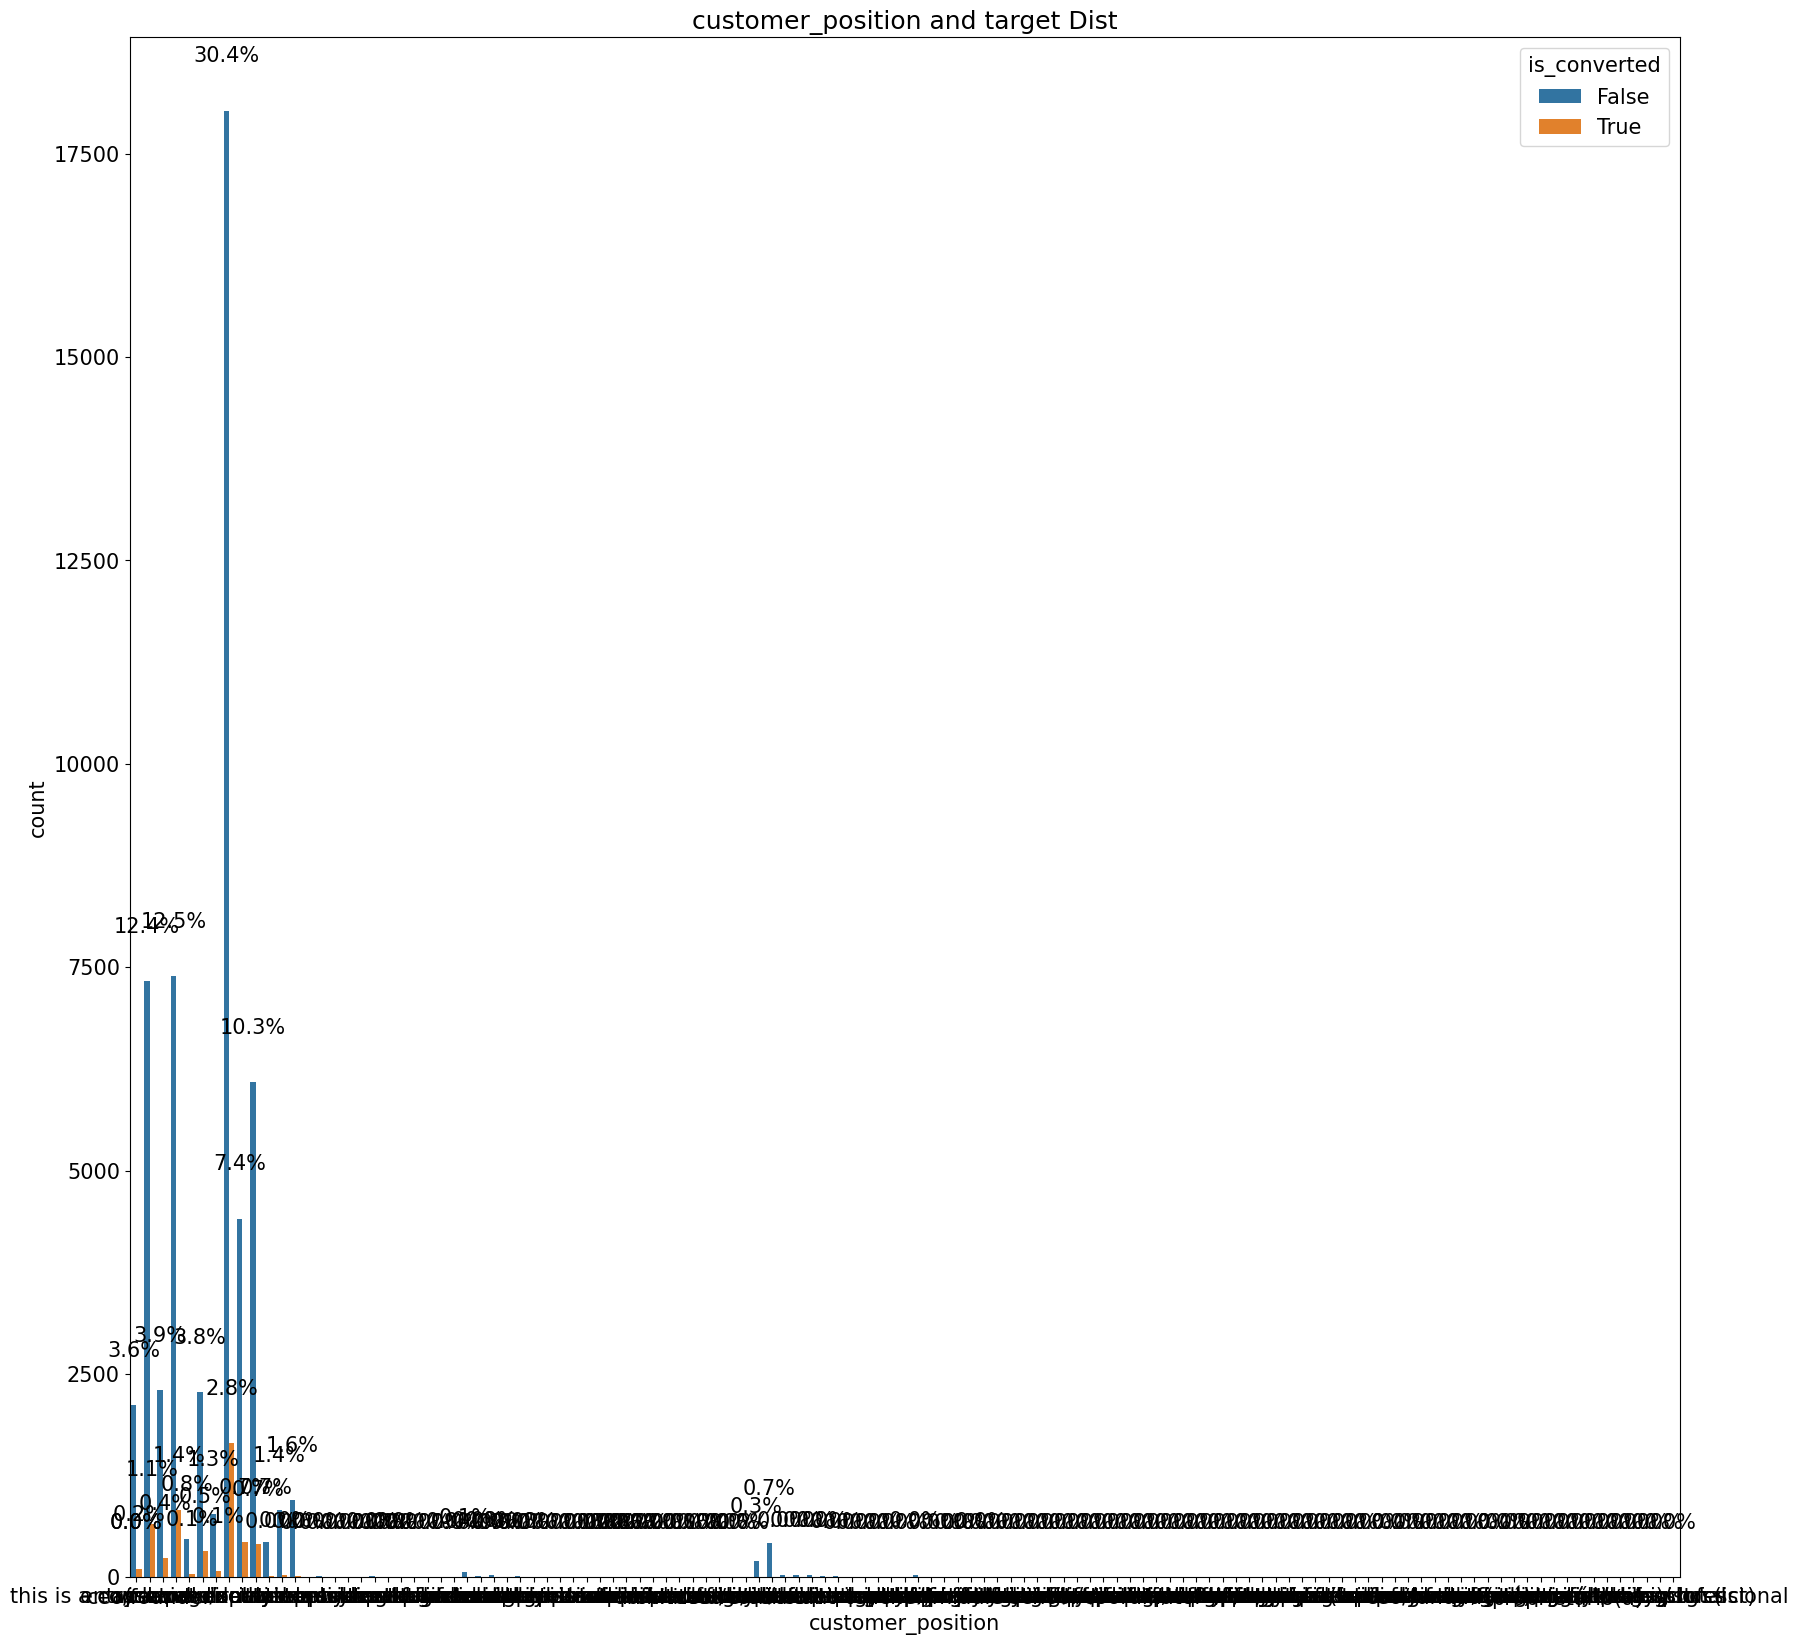

In [49]:
feature_list = [ 'customer_position']
countplot_with_target(train, feature_list, 1, 1, (20, 20))